<a href="https://colab.research.google.com/github/kiwi00121/Codigos/blob/main/Ejercicio1Kelly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipywidgets
!pip install matplotlib
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00


In [ ]:
# Ejercicio: Calcular el impuesto vehicular para el departamento de Antioquia, considerando descuentos y sanciones según la fecha de pago.
# Parámetros:
# - 7% de descuento en el impuesto de vehículo hasta el 20 de marzo.
# - Entre el 21 de marzo y el 17 de julio, los contribuyentes no recibirán ningún beneficio económico ni sanción.
# - Desde el 18 de julio en adelante se deberá pagar una sanción por extemporaneidad equivalente al 50%.
# - Tarifas según tipo de vehículo y avalúo:
#   - Automóviles:
#     - Hasta $40,000,000: 1.5%
#     - Entre $41,000,000 y $100,000,000: 2.5%
#     - Más de $100,000,000: 3.5%
#   - Motocicletas:
#     - Menos de 125 cc: 0%
#     - Más de 125 cc: 1.5%
#   - Vehículos públicos: 0.5%

Dropdown(description='Tipo de vehículo:', options=('Automóvil', 'Motocicleta', 'Vehículo público'), value='Aut…

FloatText(value=0.0, description='Avalúo del vehículo:')

FloatText(value=0.0, description='Cilindraje (cc):')

DatePicker(value=None, description='Fecha de pago:')

Button(description='Calcular Impuesto', style=ButtonStyle())

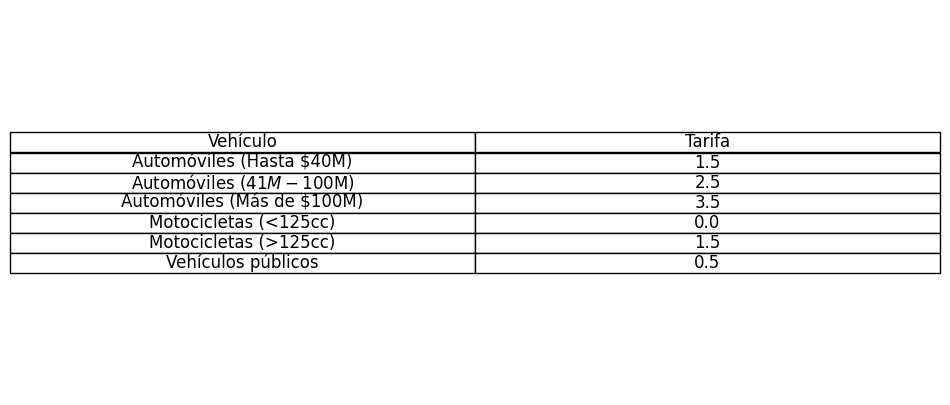

El impuesto a pagar de el Automóvil es: $787500.00
El impuesto a pagar de la Motocicleta es: $0.00
El impuesto a pagar de la Vehículo público es: $262500.00
El impuesto a pagar de la Vehículo público es: $300000.00
El impuesto a pagar de el Automóvil es: $900000.00
El impuesto a pagar de el Automóvil es: $1537500.00
El impuesto a pagar de el Automóvil es: $1162500.00


In [6]:
# Importamos las librerías necesarias
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime, date
import matplotlib.pyplot as plt
import pandas as pd

# Definimos los formularios
vehicle_type = widgets.Dropdown(
    options=['Automóvil', 'Motocicleta', 'Vehículo público'],
    description='Tipo de vehículo:'
)

vehicle_valuation = widgets.FloatText(
    description='Avalúo del vehículo:'
)

engine_capacity = widgets.FloatText(
    description='Cilindraje (cc):',
    value=0
)

payment_date = widgets.DatePicker(
    description='Fecha de pago:',
    disabled=False
)

# Función para calcular el impuesto vehicular
def calculate_tax(vehicle_type, vehicle_valuation, engine_capacity, payment_date):
    if vehicle_type == 'Automóvil':
        if vehicle_valuation <= 40000000:
            tax_rate = 0.015
        elif vehicle_valuation <= 100000000:
            tax_rate = 0.025
        else:
            tax_rate = 0.035
    elif vehicle_type == 'Motocicleta':
        if engine_capacity < 125:
            tax_rate = 0.0
        else:
            tax_rate = 0.015
    elif vehicle_type == 'Vehículo público':
        tax_rate = 0.005

    base_tax = vehicle_valuation * tax_rate

    # Convertir fechas a tipo datetime.date para la comparación
    if payment_date <= date(2024, 3, 20):
        discount = 0.07
        final_tax = base_tax * (1 - discount)
    elif payment_date <= date(2024, 7, 17):
        final_tax = base_tax
    else:
        penalty = 0.5
        final_tax = base_tax * (1 + penalty)

    return final_tax

# Función para mostrar el resultado del cálculo
def display_result(b):
    final_tax = calculate_tax(vehicle_type.value, vehicle_valuation.value, engine_capacity.value, payment_date.value)
    vehicle_article = "el" if vehicle_type.value == "Automóvil" else "la"
    print(f"El impuesto a pagar de {vehicle_article} {vehicle_type.value} es: ${final_tax:.2f}")

# Botón para calcular el impuesto
calculate_button = widgets.Button(description='Calcular Impuesto')
calculate_button.on_click(display_result)

# Mostramos los formularios y el botón
display(vehicle_type, vehicle_valuation, engine_capacity, payment_date, calculate_button)

# Datos para la tabla de tarifas
data = {
    "Vehículo": ["Automóviles (Hasta $40M)", "Automóviles ($41M - $100M)", "Automóviles (Más de $100M)",
                 "Motocicletas (<125cc)", "Motocicletas (>125cc)", "Vehículos públicos"],
    "Tarifa": [1.5, 2.5, 3.5, 0.0, 1.5, 0.5]
}

# Creamos un DataFrame
df = pd.DataFrame(data)

# Graficamos la tabla de tarifas
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()
